# Entrenamiento con datos de entrenamiento
<hr>

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pandas as pd

In [3]:
df = pd.read_csv("../Datos tratados/Datos_con_ECFP.csv")

In [4]:
X = df.drop(columns=["MorganFP", "SMILES","BBB+/BBB-", "group"])
y = df["BBB+/BBB-"]

In [17]:
labelencoder = LabelEncoder()

In [18]:
y_train_encoded = labelencoder.fit_transform(y)

In [21]:
y

0       BBB-
1       BBB-
2       BBB-
3       BBB-
4       BBB-
        ... 
7802    BBB-
7803    BBB+
7804    BBB+
7805    BBB-
7806    BBB-
Name: BBB+/BBB-, Length: 7807, dtype: object

In [20]:
y_train_encoded
# Negativo = 1
# Positivo = 0

array([1, 1, 1, ..., 0, 1, 1])

In [22]:
labelencoder.classes_

array(['BBB+', 'BBB-'], dtype=object)

In [23]:
print("Codificación de etiquetas:", dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_))))

Codificación de etiquetas: {'BBB+': 0, 'BBB-': 1}


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_train_encoded, test_size=0.2, random_state=42)

In [30]:
pipe = Pipeline([
    ('pca', PCA()),
    ('xgb', XGBClassifier())
])

In [31]:
param_grid = {
    'pca__n_components': [314],  # Ejemplo de opciones para el número de componentes en PCA
    'xgb__n_estimators': [100, 200, 300],
    'xgb__learning_rate': [1, 0.1, 0.01],
    'xgb__max_depth': [10, 20, 30, 40, 50]
}

In [32]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [33]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END pca__n_components=314, xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=100; total time=   4.0s
[CV] END pca__n_components=314, xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=100; total time=   3.7s
[CV] END pca__n_components=314, xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=100; total time=   3.7s
[CV] END pca__n_components=314, xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=100; total time=   3.6s
[CV] END pca__n_components=314, xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=100; total time=   3.6s
[CV] END pca__n_components=314, xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=200; total time=   5.7s
[CV] END pca__n_components=314, xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=200; total time=   5.7s
[CV] END pca__n_components=314, xgb__learning_rate=1, xgb__max_depth=10, xgb__n_estimators=200; total time=   5.4s
[CV] END pca__n_co

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'pca__n_components': [314],
                         'xgb__learning_rate': [1, 0.1, 0.01],
                         'xgb__max_depth': [10, 20, 30, 40, 50],
                         'xgb__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [34]:
grid_search.best_params_

{'pca__n_components': 314,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 40,
 'xgb__n_estimators': 300}

In [35]:
grid_search.best_score_

0.8717373899119295

# Entrenamiento con los datos de prueba
<hr>

In [39]:
pipe = Pipeline([
    ('pca', PCA(n_components=314)),
    ('svc', XGBClassifier(learning_rate=0.1, max_depth=40, n_estimators=300))
])

In [40]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=314)),
                ('svc',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=40, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

# Resultados del modelo
<hr>

In [41]:
y_predicha = pipe.predict(X_test)

In [42]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.868
Recall 0.868
precision 0.868
f1 0.866


In [43]:
y_entrenamiento = pipe.predict(X_train)

In [44]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.983
Recall 0.983
precision 1.0
f1 0.983


# Confusion Matrix
<hr>

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [46]:
mat = confusion_matrix(y_predicha, y_test)

<Axes: >

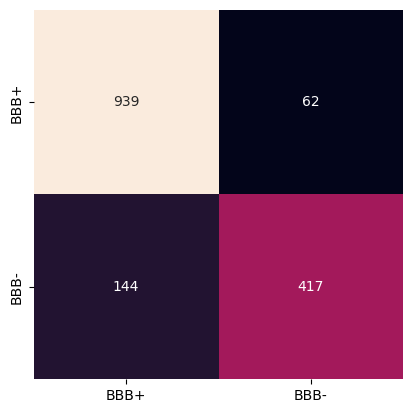

In [48]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["BBB+/BBB-"].value_counts().index, yticklabels=df["BBB+/BBB-"].value_counts().index)

# Guardar modelo
<hr>

In [49]:
import joblib

In [50]:
joblib.dump(pipe, '../Guardado de modelos/modelo_XGBoost.joblib')

['../Guardado de modelos/modelo_XGBoost.joblib']